# 統計學習初論 (Spring, 2019)



# 第一題 [myknn_regressor]
(50%) K-nearest-neighbors (KNN) is a power method to construct nonparametric regression models. The goal of this question is to construct your own KNN regressor. To simplify the question, we are going to use the "brute-force" method to find nearest neighbors. That is, we are not going to use specialized data structures such as the K-D tree to speed up the process. Given a set of  N  training data points and a pre-defined hyper-parameter k, the prediction for a testing data point  xa  is computed by locating  k  data points in the training data that is cloest to  xa . If the outcome values of the  k  nearest neighbors are  ya={y1,y2,...,yk} , then the prediction is  f(ya) , where  f  is a real-valued function. We are going to consider two possible choices of  f . The first option is f(ya)=1/k∑ki=1yi.  This is referred to as the "equal-weight" case. The other option is to compute the mean after removing outliers. We define outliers as the data points that are outside of  [Q1−1.5IQR,Q3+1.5IQR] , where  Q1  and  Q3  are the first and third quantile of  ya , and  IQR=Q3−Q1 . Since quantiles and IQR only make sense when there are enough neighbors, we allow the "remove_outliers" only if  k>=10 . If  k<10 , use the "equal_weight"  f  even if the user specify the other way.

Creat a Python class named myknn_regressor that can do predictions given training data and hyper-parameters. It should take the  k  as the hyper-parameter for the number of neighbors. Moreover, the user can select  f  by passing "equal_weight" or "remove_outliers" to switch between the two possible cases for  f .

The sample usage should be like the following:

myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
The first line initiates an myknn_regressor object with  k=20  and selected "remove_outliers" for  f ; the second line train the model and the third line computes prediction.

You are only allowed to use numpy in your own myknn_regressor class. You will receive a zero score if you adopted an existing KNN regressor such as those in scikit-learn. The input features and output predictions should be numpy arrays. If there is a tie in selecting neighbors, myknn_regressor should break the tie by choosing the data point that is located closer to the beginning of the training dataset.

Dataset
We are going to use a subset of the "Million Songs Dataset" in this question. The dataset has been pre-processed and the training and testing dataset has been splitted and stored in a dictionary data structure. You can load the data from msd_data1.pickle using pickle.load(). There are four elements in the dictionary: X_train, Y_train, X_test, Y_test. As indicated by their names, these four elements are training and testing data. The outcome variable (i.e.  y ) is the year a song was released, and the features are variables that characterize the sound of a song. The goal is to predict the release year given sound features.

Answer the following questions:

Q1.1 Create your myknn_regressor.
Q1.2 Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  k=20  and "equal_weight"  f . List the RMSE and the first 20 predictions in the testing data.
Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  k=20  and "remove_outier"  f . List the RMSE and the first 20 predictions in the testing data.
# 第二題 [Tuning the Hyper-parameter]
(50%) We are going to explore the issue of hyper-parameter tuning in this question. We are going to consider three cases in this question. Use the knn regressor from klearn.neighbors.KNeighborsRegressor for the first two cases, and your own myknn_regressor for the third cases.

For each case, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using  k=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200 . In the first case, all feature values are standardize to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case use standardized feature and adopted myknn_regressor with "remove_outlier"  f  to make prediction.

For each case, plot a curve that shows the relations between  k  (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure so that we can visually inspect their dynamics. Discuss your observations.

Question 1  [myknn_regressor]
==
## (a) create my own Knn regressor

###  - Initialize for paramters of myknn_regressor class

In [ ]:
class myknn_regressor ():
    
    def __init__(self, k=20, filters='remove_outliers'):
        self.k = k
        if k < 10:
            self.filters = 'equal_weight'
        else:
            if filters == 'equal_weight' or filters=='remove_outliers':
                self.filters = filters
        self.x_train = []
        self.y_train = []
        self.distri = dict() #distribution
        
    

### - fit the training data from the dataset, and also standardized all features 

In [ ]:
    def fit(self, x_train, y_train, if_std =True):
        if if_std:
            feature = dict()
            length = len(x_train)
            fea_length = len(x_train[0])
    #         print(length fea_length)
            for data in x_train:
                index = 0 
                for detail in data:
                    if not feature.get(index):
                        feature[index] = []
                    feature[index].append(detail)
                    index += 1
            for key, val in feature.items():
                means = np.mean(val)
                std = np.std(val, dtype=np.float64)
                self.distri[key] = {'mean': means, 'std': std}
                result = []
                for i in val:
                    result.append((i-means)/std)
                feature[key] = result
            x_std_train = []
            for i in range(length):
                temp = []
                for j in range(fea_length):
                    temp.append(feature[j][i])
                x_std_train.append(temp)
            self.x_train = x_std_train
        else:
            self.x_train = x_train
        self.y_train = y_train

    

### - predict the testing data, and filter the outsiders according to number of k or user's choice

In [122]:
    def predict(self, x_test):
        temp = x_test.copy()
        for i in range(len(x_test)):
            temp[i] = (x_test[i]- self.distri[i]['mean']) / self.distri[i]['std']
        record = dict()
        for i in range(len(self.x_train)):
            record[i] = np.linalg.norm(self.x_train[i] - temp)
        result = sorted(record.items(), key=lambda d: d[1])
        near_k = result[:self.k]
        if self.filters == 'remove_outliers':
            val = []
            for i in self.get_val(near_k):
                val.append(self.y_train[i])
            Q1 = np.quantile(val, 0.25)
            Q3 = np.quantile(val, 0.75)
            IQR = Q3 - Q1 
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            for i in range(self.k):
                if self.y_train[near_k[i][0]] > upper_bound or self.y_train[near_k[i][0]] < lower_bound:
                    near_k[i] = None
        avg_y = 0
        count = 0
        for i in range(self.k):
            if near_k[i] != None:
#                 print(near_k[i][0])
                avg_y += self.y_train[near_k[i][0]]
                count += 1
        return avg_y / count

    def get_val(self, record):
        ans = []
        for i in record:
            ans.append(i[1])
        return ans

## (b) Make predictions using  k=20  and "equal_weight"   . List the RMSE and the first 20               predictions in the testing data

In [112]:
import pickle 
import numpy as np
import math


def  main():
    with open('msd_data1.pickle', 'rb') as f:
        myknn = myknn_regressor(20, 'equal_weight')
        data = pickle.load(f)
        myknn.fit(data['X_train'], data['Y_train'])
        RMSE = float()
        num = len(data['X_test'])
        for i in range(num):
            y_pred = myknn.predict(data['X_test'][i])
#             print(data['Y_test'][i], y_pred )
            RMSE += ((y_pred - data['Y_test'][i]) **2)
        RMSE = RMSE / num
        print("RMSE :" ,math.sqrt(RMSE))

        
if __name__ == '__main__':
    main()

| Truth year | Predicted year |
| --- | --- |
|1998.0 |1993.35|
|1988.0 |1993.8|
|2005.0 |2000.65|
|1982.0 |1991.5|
|1990.0 |1992.8|
|1995.0 |1998.5|
|2005.0 |1988.1|
|1994.0 |1991.65|
|2005.0 |2002.25|
|2009.0 |2003.0|
|2007.0 |2000.5|
|1996.0 |1998.65|
|2006.0 |1995.55|
|2005.0 |1997.2|
|1994.0 |1995.05|
|1992.0 |1997.4|
|2000.0 |1992.15|
|2007.0 |2000.45|
|2003.0 |2003.2|
|2003.0 |1995.75|


RMSE : 10.251264515495954
 * The RMSE is 10.251264515495954 when  using k=20 and "equal_weight" over all testing data and the first 20 predictions are showed above.

## (c) Make predictions using  k=20  and "remove_outier"  f . List the RMSE and the first 20 predictions in the testing data. 

In [114]:
import pickle 
import numpy as np
import math


def  main():
    with open('msd_data1.pickle', 'rb') as f:
        myknn = myknn_regressor(20, 'remove_outliers')
        data = pickle.load(f)
        myknn.fit(data['X_train'], data['Y_train'])
        RMSE = float()
        num = len(data['X_test'])
        for i in range(num):
            y_pred = myknn.predict(data['X_test'][i])
            RMSE += ((y_pred - data['Y_test'][i]) **2)
        RMSE = RMSE / num
        print("RMSE :" ,math.sqrt(RMSE))

        
if __name__ == '__main__':
    main()

RMSE : 10.212572466080363




| Truth year | Predicted year |
| :- | :---: |
|1998.0|1993.35|
|1988.0|1993.8|
|2005.0|2000.65|
|1982.0|1992.7368421052631|
|1990.0|1992.8|
|1995.0|2000.0|
|2005.0|1988.1|
|1994.0|1991.65|
|2005.0|2002.25|
|2009.0|2003.9473684210527|
|2007.0|2000.5|
|1996.0|2000.9444444444443|
|2006.0|1995.55|
|2005.0|1997.2|
|1994.0|1998.611111111111|
|1992.0|1997.4|
|2000.0|1992.15|
|2007.0|2003.8333333333333|
|2003.0|2003.2|
|2003.0|1995.75|

RMSE : 10.212572466080363
    
* The RMSE is 10.212572466080363 when  using k=20 and "remove_outliers" over all testing data and the first 20 predictions are showed above.

Conclusion for question one :
==
With 'remove outliers' method, the RMSE value will decrease from 10.251264515495954 to 10.212572466080363 by ignoring extreme value. Therefore, the 'remove outliers' method has better performance than 'equal weight' when k =20 .

Question 2:  Tuning the Hyper-parameter
==

## (a) Case 1: klearn.neighbors.KNeighborsRegressor, apply feature scaling

In [123]:
from sklearn.neighbors import KNeighborsRegressor

import pickle 
import numpy as np
import math
import matplotlib.pyplot as plt

K_NUM = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

def  main():
    with open('msd_data1.pickle', 'rb') as f:
        data = pickle.load(f)
        x_axis = []
        y_axis = []
        for k in K_NUM:
            neigh = KNeighborsRegressor(n_neighbors=k)
            std_x_train, distri = fea_std(data['X_train'])
            neigh.fit(std_x_train, data['Y_train'])
            RMSE = 0
            num = len(data['X_test'])
            for i in range(num):
                temp = data['X_test'][i].copy()
                for j in range(len(data['X_test'][i])):
                    temp[j] = (data['X_test'][i][j] - distri[j]['mean']) /  distri[j]['std']
                y_pred = neigh.predict( [temp] )
                RMSE += ((y_pred - data['Y_test'][i]) **2)
            RMSE = RMSE / num
            print('k = ', k,"RMSE :" ,math.sqrt(RMSE))
            x_axis.append(k)
            y_axis.append(math.sqrt(RMSE))
        plt.plot(x_axis, y_axis, 'ro',x_axis, y_axis, 'k')
        plt.ylabel('RMSE')
        plt.xlabel('k number')
        plt.show()
        
        
def fea_std(x_train):
    feature = dict()
    length = len(x_train)
    fea_length = len(x_train[0])
#         print(length fea_length)
    for data in x_train:
        index = 0 
        for detail in data:
            if not feature.get(index):
                feature[index] = []
            feature[index].append(detail)
            index += 1
    distri = dict()
    for key, val in feature.items():
        means = np.mean(val)
        std = np.std(val, dtype=np.float64)
        distri[key] = {'mean': means, 'std': std}
        result = []
        for i in val:
            result.append((i-means)/std)
        feature[key] = result
    x_std_train = []
    for i in range(length):
        temp = []
        for j in range(fea_length):
            temp.append(feature[j][i])
        x_std_train.append(temp)
    return x_std_train, distri


if __name__ == '__main__':
    main()

    k =  1 RMSE : 13.911074724837043
    k =  2 RMSE : 12.068170946750795
    k =  3 RMSE : 11.389120864846118
    k =  4 RMSE : 11.1123354880961
    k =  5 RMSE : 10.894692897614583
    k =  10 RMSE : 10.425998912973917
    k =  15 RMSE : 10.318171959828582
    k =  20 RMSE : 10.251264515495954
    k =  25 RMSE : 10.237627225094682
    k =  30 RMSE : 10.215977156359507
    k =  35 RMSE : 10.205243203546752
    k =  40 RMSE : 10.204332770527747
    k =  45 RMSE : 10.20724317182286
    k =  50 RMSE : 10.206033712139769
    k =  55 RMSE : 10.20886238444681
    k =  60 RMSE : 10.217002627247632
    k =  80 RMSE : 10.231954198429065
    k =  100 RMSE : 10.24729594738695
    k =  120 RMSE : 10.264908458982786
    k =  140 RMSE : 10.287098382403649
    k =  160 RMSE : 10.317788599090445
    k =  180 RMSE : 10.330995620176944
    k =  200 RMSE : 10.351940397014145
<img src="img/case.png" width = 400; height= 500; />

## (b) Case 2: klearn.neighbors.KNeighborsRegressor, not apply feature scaling

In [52]:
from sklearn.neighbors import KNeighborsRegressor

import pickle 
import numpy as np
import math
import matplotlib.pyplot as plt


K_NUM = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

def  main():
    with open('msd_data1.pickle', 'rb') as f:
        data = pickle.load(f)
        x_axis = []
        y_axis = []
        for k in K_NUM:
            neigh = KNeighborsRegressor(n_neighbors=k)
            neigh.fit(data['X_train'], data['Y_train'])
            RMSE = 0
            num = len(data['X_test'])
            for i in range(num):
                y_pred = neigh.predict([data['X_test'][i]])
                RMSE += ((y_pred - data['Y_test'][i]) **2)
            RMSE = RMSE / num
#             print('k = ', k,"RMSE :" ,math.sqrt(RMSE))
            x_axis.append(k)
            y_axis.append(math.sqrt(RMSE))
#         plt.plot(x_axis, y_axis, 'ro',x_axis, y_axis, 'k')
#         plt.ylabel('RMSE')
#         plt.xlabel('k number')
#         plt.show()
        
if __name__ == '__main__':
    main()

    k =  1 RMSE : 14.923638966418345
    k =  2 RMSE : 12.777499755429464
    k =  3 RMSE : 12.075674967716077
    k =  4 RMSE : 11.767805657810635
    k =  5 RMSE : 11.466392632384453
    k =  10 RMSE : 11.077460900404935
    k =  15 RMSE : 10.88897913794797
    k =  20 RMSE : 10.797788546734951
    k =  25 RMSE : 10.790073017979692
    k =  30 RMSE : 10.750265612567011
    k =  35 RMSE : 10.717738719772298
    k =  40 RMSE : 10.714437504678774
    k =  45 RMSE : 10.698494013475859
    k =  50 RMSE : 10.69110105960404
    k =  55 RMSE : 10.68260873412441
    k =  60 RMSE : 10.672535729098705
    k =  80 RMSE : 10.662907517124506
    k =  100 RMSE : 10.677019504524656
    k =  120 RMSE : 10.68313963899639
    k =  140 RMSE : 10.687017556442067
    k =  160 RMSE : 10.691630026202139
    k =  180 RMSE : 10.69071978380711
    k =  200 RMSE : 10.69885337470018
<img src="img/case2.png" width = 400; height= 500; />

## (c) Case 3: Adopt myknn_regressor with "remove_outlier"  f  to make prediction.

In [124]:
import pickle 
import numpy as np
import math
import matplotlib.pyplot as plt

K_NUM = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

def  main():
    with open('msd_data1.pickle', 'rb') as f:
        data = pickle.load(f)
        x_axis = []
        y_axis = []
        for k in K_NUM:
            myknn = myknn_regressor(k, 'remove_outliers')
            myknn.fit(data['X_train'], data['Y_train'])
            RMSE = 0
            num = len(data['X_test'])
            for i in range(num):
                y_pred = myknn.predict(data['X_test'][i])
                RMSE += ((y_pred - data['Y_test'][i]) **2)
            RMSE = RMSE / num
            print('k = ', k,"RMSE  :" ,math.sqrt(RMSE ))
            x_axis.append(k)
            y_axis.append(math.sqrt(RMSE))
        plt.plot(x_axis, y_axis, 'ro',x_axis, y_axis, 'k')
        plt.ylabel('RMSE')
        plt.xlabel('k number')
        plt.show()
        
if __name__ == '__main__':
    main()
    


    k =  1 RMSE  : 13.911074724837043
    k =  2 RMSE  : 12.068170946750795
    k =  3 RMSE  : 11.389120864846118
    k =  4 RMSE  : 11.1123354880961
    k =  5 RMSE  : 10.894692897614583
    k =  10 RMSE  : 10.468549209697095
    k =  15 RMSE  : 10.293424167991523
    k =  20 RMSE  : 10.212572466080363
    k =  25 RMSE  : 10.191475378971322
    k =  30 RMSE  : 10.132105705172405
    k =  35 RMSE  : 10.109608004792968
    k =  40 RMSE  : 10.093231539122925
    k =  45 RMSE  : 10.08001889147962
    k =  50 RMSE  : 10.080783333249341
    k =  55 RMSE  : 10.059767600751961
    k =  60 RMSE  : 10.073857809066574
    k =  80 RMSE  : 10.063683549276593
    k =  100 RMSE  : 10.064917276737452
    k =  120 RMSE  : 10.067237203620257
    k =  140 RMSE  : 10.090646192390146
    k =  160 RMSE  : 10.115316675702935
    k =  180 RMSE  : 10.124987056716332
    k =  200 RMSE  : 10.146220720227742
<img src="img/case3.png" width = 400; height= 500; />

## combine three plot:


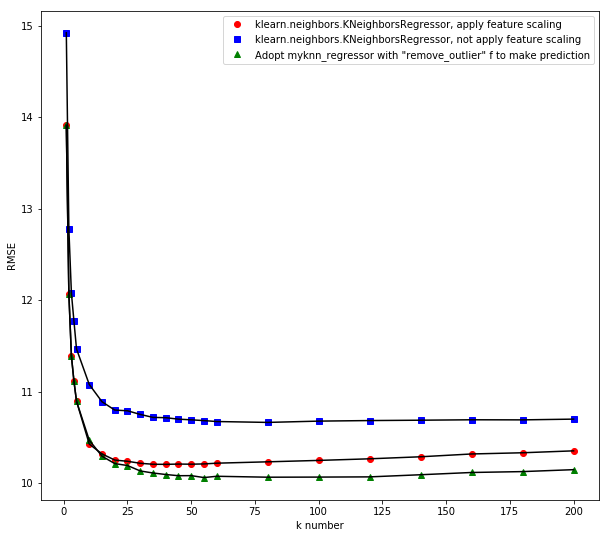

 * red points for case1, blue points for case2, green points for case3


In [120]:
K_NUM = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

case1 = [13.911074724837043,12.068170946750795,11.389120864846118,11.1123354880961,10.894692897614583,10.425998912973917,10.318171959828582,10.251264515495954,10.237627225094682,10.215977156359507,10.205243203546752,10.204332770527747,10.20724317182286,10.206033712139769,10.20886238444681,10.217002627247632,10.231954198429065,10.24729594738695,10.264908458982786,10.287098382403649,10.317788599090445,10.330995620176944,10.351940397014145]
case2 = [14.923638966418345,12.777499755429464,12.075674967716077,11.767805657810635,11.466392632384453,11.077460900404935,10.88897913794797
,10.797788546734951,10.790073017979692,10.750265612567011,10.717738719772298,10.714437504678774,10.698494013475859,10.69110105960404,10.68260873412441,10.672535729098705,10.662907517124506,10.677019504524656,10.68313963899639,10.687017556442067,10.691630026202139,10.69071978380711,10.69885337470018,]
case3 = [13.911074724837043,12.068170946750795,11.389120864846118,11.1123354880961,10.894692897614583,10.468549209697095,10.293424167991523,10.212572466080363,10.191475378971322,10.132105705172405,10.109608004792968,10.093231539122925,10.08001889147962,10.080783333249341,10.059767600751961,10.073857809066574,10.063683549276593,10.064917276737452,10.067237203620257,10.090646192390146,10.115316675702935,10.124987056716332,10.146220720227742]
x_axis = K_NUM
plt.figure(figsize=(10, 9))
plt.plot(x_axis, case1, 'ro',x_axis, case2, 'bs', x_axis, case3, 'g^',x_axis, case3, 'k',x_axis, case1, 'k',x_axis, case2, 'k')
plt.ylabel('RMSE')
plt.xlabel('k number')

plt.legend(['klearn.neighbors.KNeighborsRegressor, apply feature scaling','klearn.neighbors.KNeighborsRegressor, not apply feature scaling','Adopt myknn_regressor with "remove_outlier" f to make prediction'])
plt.show()
print(' * red points for case1, blue points for case2, green points for case3')

Conclusion for question two :
===
&emsp;For three methods, RMSE value will decrease while k number increases.On the other hand, with feature scaling, the RMSE value will smaller than without it. And with 'remove outliers' and feature scaling method at the same time, the performance will be the best among these three methods.

# full code :

In [109]:
class myknn_regressor ():
    
    def __init__(self, k=20, filters='remove_outliers'):
        self.k = k
        if k < 10:
            self.filters = 'equal_weight'
        else:
            if filters == 'equal_weight' or filters=='remove_outliers':
                self.filters = filters
        self.x_train = []
        self.y_train = []
        self.distri = dict() #distribution
        
    def fit(self, x_train, y_train, if_std =True):
        if if_std:
            feature = dict()
            length = len(x_train)
            fea_length = len(x_train[0])
    #         print(length fea_length)
            for data in x_train:
                index = 0 
                for detail in data:
                    if not feature.get(index):
                        feature[index] = []
                    feature[index].append(detail)
                    index += 1
            for key, val in feature.items():
                means = np.mean(val)
                std = np.std(val, dtype=np.float64)
                self.distri[key] = {'mean': means, 'std': std}
                result = []
                for i in val:
                    result.append((i-means)/std)
                feature[key] = result
            x_std_train = []
            for i in range(length):
                temp = []
                for j in range(fea_length):
                    temp.append(feature[j][i])
                x_std_train.append(temp)
            self.x_train = x_std_train
        else:
            self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        temp = x_test.copy()
        for i in range(len(x_test)):
            temp[i] = (x_test[i]- self.distri[i]['mean']) / self.distri[i]['std']
        record = dict()
        for i in range(len(self.x_train)):
            record[i] = np.linalg.norm(self.x_train[i] - temp)
        result = sorted(record.items(), key=lambda d: d[1])
        near_k = result[:self.k]
        if self.filters == 'remove_outliers':
            val = []
            for i in self.get_val(near_k):
                val.append(self.y_train[i])
            Q1 = np.quantile(val, 0.25)
            Q3 = np.quantile(val, 0.75)
            IQR = Q3 - Q1 
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            for i in range(self.k):
                if self.y_train[near_k[i][0]] > upper_bound or self.y_train[near_k[i][0]] < lower_bound:
                    near_k[i] = None


        avg_y = 0
        count = 0
        for i in range(self.k):
            if near_k[i] != None:
                avg_y += self.y_train[near_k[i][0]]
                count += 1
#         print(count)
        return avg_y / count

    def get_val(self, record):
        ans = []
        for i in record:
            ans.append(i[0])
        return ans